In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import misc

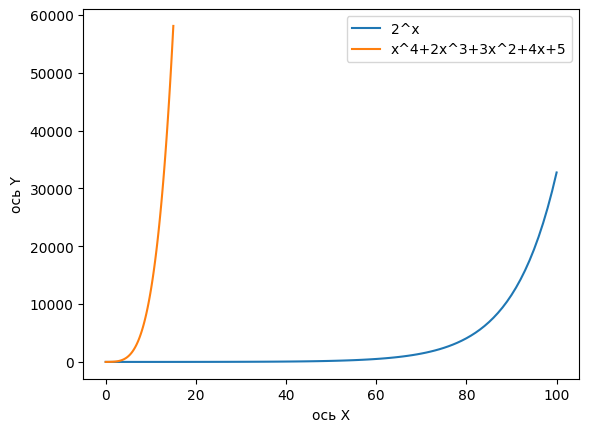

In [4]:
x = np.linspace(0,15,101)
y = np.exp2(x)
plt.plot(y, label='2^x')
plt.plot(x, 1*x**4+2*x**3+3*x**2+4*x+5, label='x^4+2x^3+3x^2+4x+5')
plt.xlabel('ось X')
plt.ylabel('ось Y')
plt.legend()
plt.show()

In [5]:
#Задание 2
df = pd.read_csv('C:/Users/student.501CLASSCOMP3/Desktop/datatraining.txt', sep=',')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [6]:
df.index = pd.to_datetime(df.date)
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
2015-02-10 09:29:00,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1


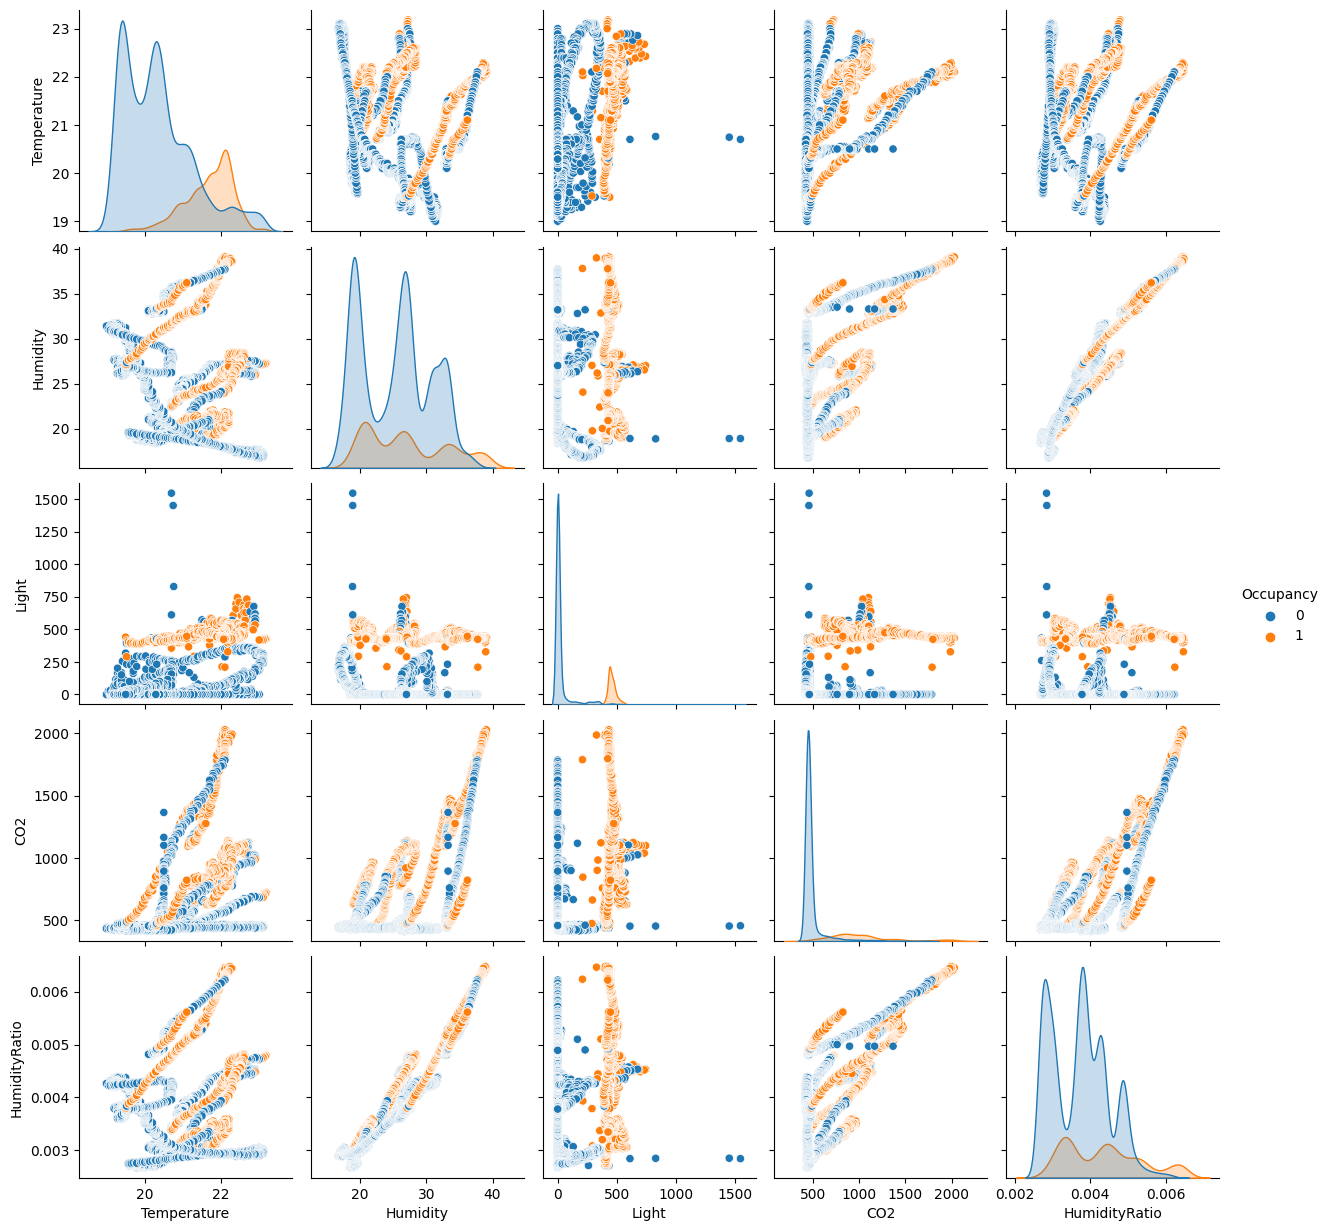

In [7]:
sns.pairplot(df.drop('date', axis=1), hue='Occupancy')
plt.show()

In [8]:
def func(df):
    return (df - df.mean())/df.std()

C:\Users\student.501CLASSCOMP3\AppData\Local\Temp\ipykernel_1632\1428756525.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (df - df.mean())/df.std()
C:\Users\student.501CLASSCOMP3\AppData\Local\Temp\ipykernel_1632\1428756525.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return (df - df.mean())/df.std()


<AxesSubplot: >

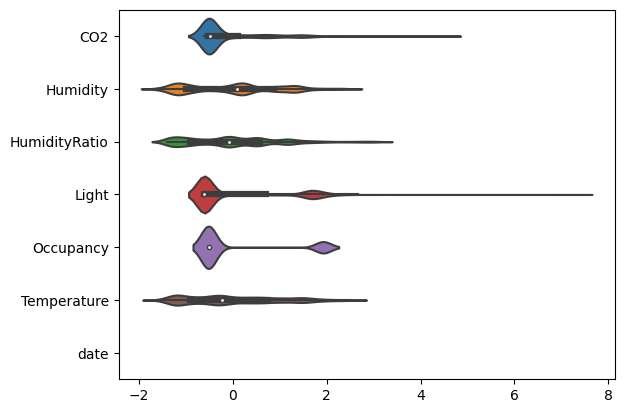

In [9]:
df1 = func(df)
sns.violinplot(data=df1, orient='h')

In [14]:
df1.resample('30 min').sum()

C:\Users\student.501CLASSCOMP3\AppData\Local\Temp\ipykernel_1632\1619459789.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.resample('30 min').sum()


,CO2,Humidity,HumidityRatio,Light,Occupancy,Temperature
date,,,,,,
2015-02-04 17:30:00,2.842903,2.422785,9.561782,14.037197,17.333363,22.182990
2015-02-04 18:00:00,7.221866,9.182427,30.870184,-3.967022,1.021517,67.665416
2015-02-04 18:30:00,2.166286,8.789448,24.851796,-17.796963,-15.055818,50.777598
2015-02-04 19:00:00,-1.625369,8.214256,22.591145,-18.410651,-15.574984,46.034583
2015-02-04 19:30:00,-5.001577,7.772247,20.332656,-19.024340,-16.094150,40.702368
...,...,...,...,...,...,...
2015-02-10 07:30:00,-15.224676,40.895344,36.617628,-19.024340,-16.094150,-9.630348
2015-02-10 08:00:00,-14.201011,38.756062,34.653622,-17.796963,-15.055818,-9.237166
2015-02-10 08:30:00,-11.716437,42.180898,39.138482,29.355148,33.326922,-6.120636


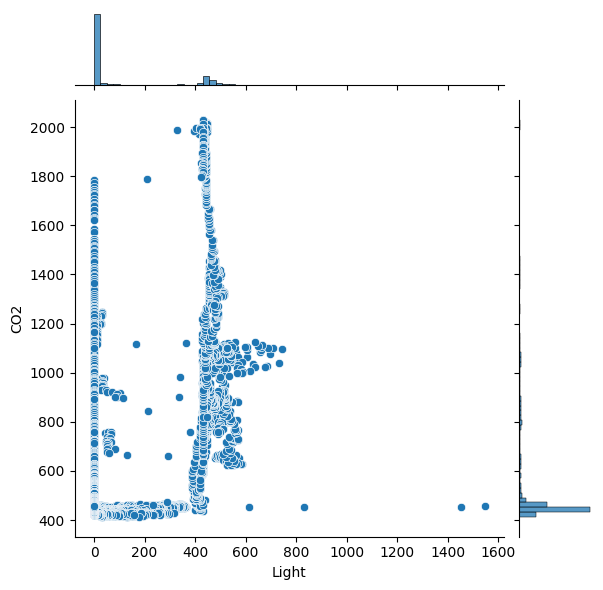

In [15]:
sns.jointplot(data=df, x=df.Light, y=df.CO2)
plt.show()

In [70]:
#Задание 3
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
df.loc[df['sex'] == 'male', 'gender'] = 1
df.loc[df['sex'] == 'female', 'gender'] = 0
df1 = df[['survived', 'pclass', 'gender', 'age']].corr()
df1

,survived,pclass,gender,age
survived,1.000000,-0.338481,-0.543351,-0.077221
pclass,-0.338481,1.000000,0.131900,-0.369226
gender,-0.543351,0.131900,1.000000,0.093254
age,-0.077221,-0.369226,0.093254,1.000000


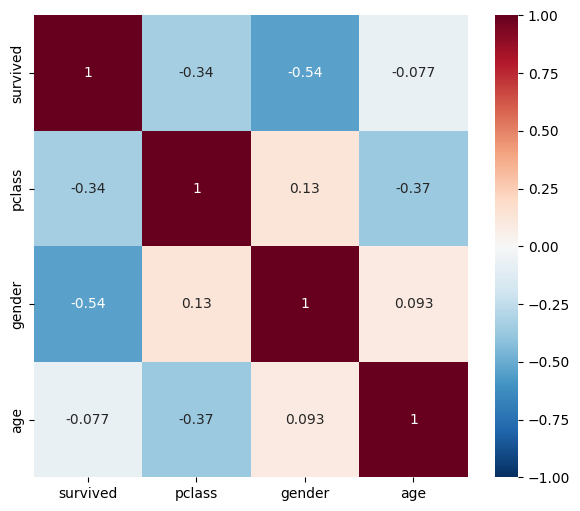

In [72]:
plt.figure(figsize=(7,6))
sns.heatmap(df1, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)
plt.show()

<AxesSubplot: xlabel='class', ylabel='survived'>

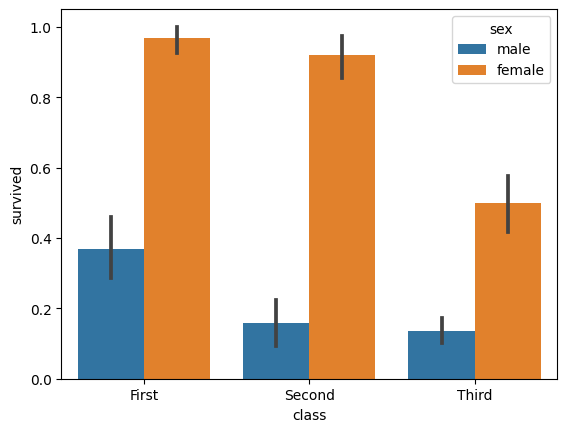

In [73]:
sns.barplot(data=df, x="class", y="survived", hue="sex")

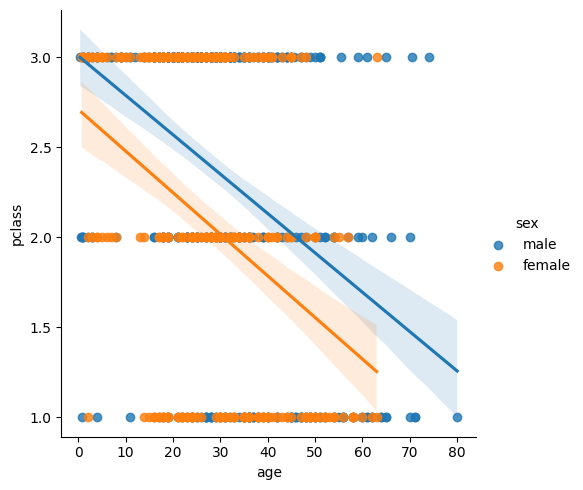

In [76]:
sns.lmplot(data=df, x=df.columns[3], y=df.columns[1], hue='sex')

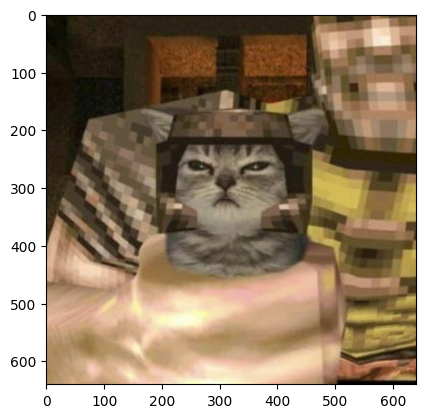

In [49]:
#Задание 4
import matplotlib.image as mpimg
img = mpimg.imread('D:/funny.png')
plt.imshow(img)


In [50]:
colourImg = Image.open("D:/funny.png")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata())
df = pd.DataFrame(colourArray, columns=["red1","green1","blue1"])
df

,red1,green1,blue1
0,18,16,4
1,18,16,4
2,18,16,4
3,18,16,4
4,17,15,3
...,...,...,...
409595,4,4,2
409596,4,4,2
409597,4,4,2
409598,3,3,1


<AxesSubplot: >

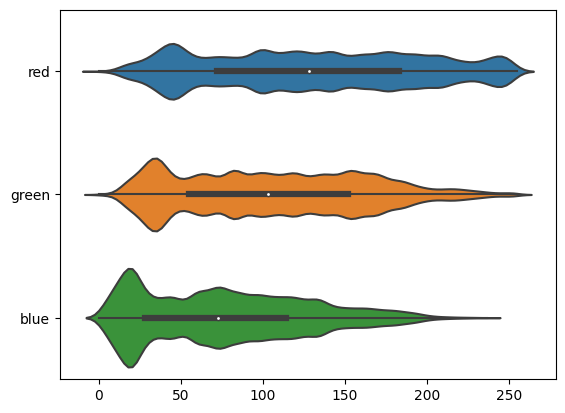

In [36]:
sns.violinplot(data=df, orient='h')

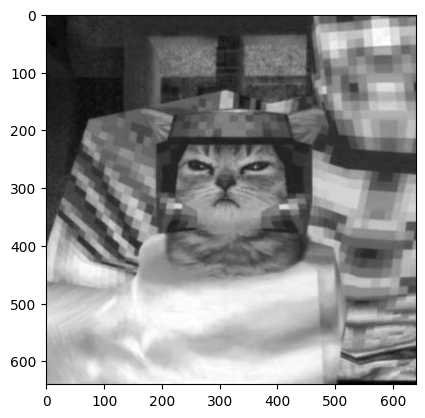

In [40]:
gimg = img[:, :, 0]
plt.imshow(gimg, cmap='gray')

In [43]:
colourImg = Image.open("D:/notfunny.png")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata())
dfg = pd.DataFrame(colourArray, columns=["red2","green2","blue2"])
dfg

,red2,green2,blue2
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
177645,255,255,255
177646,255,255,255
177647,255,255,255
177648,255,255,255


In [48]:
df = pd.concat([df,dfg])
df

,red,green,blue,red2,green2,blue2
0,18.0,16.0,4.0,NaN,NaN,NaN
1,18.0,16.0,4.0,NaN,NaN,NaN
2,18.0,16.0,4.0,NaN,NaN,NaN
3,18.0,16.0,4.0,NaN,NaN,NaN
4,17.0,15.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...
177645,NaN,NaN,NaN,255.0,255.0,255.0
177646,NaN,NaN,NaN,255.0,255.0,255.0
177647,NaN,NaN,NaN,255.0,255.0,255.0
177648,NaN,NaN,NaN,255.0,255.0,255.0
